In [68]:
import numpy as np
from numpy import random as rd
from pykrx import stock
import pandas as pd

#여러 ETF들 종목코드
#ETF_ticker = ["252670", "122630", "233740", "251340", "114800", "069500", "102110", "225800", "138230", "132030", "280940", "292570", "292590", "292580"]
ETF_ticker = ["122630", "132030", "292580"]
N = len(ETF_ticker) #ETF 갯수만큼 자산 총 갯수는 N개로 제한된다.
stocks_data = []
srt = "20140101"
end = "20191231"
for i in range(0, N):
    stocks_data.append(stock.get_market_ohlcv_by_date(srt, end, ETF_ticker[i])["종가"][-300:])


In [144]:
np.var(stocks_data[0])
np.cov(stocks_data[0], stocks_data[0])

array([[594114.08333333, 594114.08333333],
       [594114.08333333, 594114.08333333]])

In [145]:
len(stocks_data[0])

300

In [146]:
arr123 = [3,5,10,7,4,1,2]
np.var(arr123, ddof=1)

9.619047619047619

In [147]:
np.cov(arr123, arr123)#, bias=True)

array([[9.61904762, 9.61904762],
       [9.61904762, 9.61904762]])

In [148]:
np.cov([1,2,3],[1,2,3])

array([[1., 1.],
       [1., 1.]])

In [69]:
#generate var - cov matrix
def getCov(a, b):
    return np.cov(a,b)

var_cov_mat = np.identity(N) # gen N x N identity matrix

for i in range(0, N):
    for j in range(0, N):
        var_cov_mat[i][j] = getCov(stocks_data[i], stocks_data[j])[0,1]

In [70]:
import pandas as pd
df = pd.DataFrame(var_cov_mat)
df

,0,1,2
0,768600.458194,-42477.663880,131490.152174
1,-42477.663880,456940.671962,-203182.730491
2,131490.152174,-203182.730491,136132.357581


In [71]:
w = [1/N for i in range(0,N)] # variable
w2 = [0.1 , 0.1, 0.4, 0.4]
rc = [] # 매 시행마다의 rc. 최종 시행 후 각 요소들이 거의 동일해야함
sigma_dot_w = np.dot(var_cov_mat, w) # constant
for i in range(1000):
    rc.append(w * sigma_dot_w)
    min_index = np.argmin(rc[i])
    max_index = np.argmax(rc[i])
    w[min_index] += 0.01
    w[max_index] -= 0.01
    
    #매 시행 끝난 후 rc 출력
    print(f"{i}|RC {np.round(rc[i],3)}", end='')
    rc_var = np.var(rc[i])
    print(f"|LOSS {rc_var}")
    #min_index = rc[i].index(min(rc[-1]))
#    print(rc[i], w)
#    w[0] += 0.1
#    w[1] += -0.1
#    print(w)
#print(w2 * sigma_dot_w)
#print(rc[0])
#print(rc[1])
#print(rc[2])
#print(rc[3])

np.argmin(rc[1])
np.argmin(rc[0])
np.argmin(rc[3])
np.argmin(rc[2])

0|RC [95290.327 23475.586  7159.975]|LOSS 1465612790.1729212
1|RC [92431.618 23475.586  7374.775]|LOSS 1360981875.8097312
2|RC [89572.908 23475.586  7589.574]|LOSS 1260276476.706303
3|RC [86714.198 23475.586  7804.373]|LOSS 1163496592.8626366
4|RC [83855.488 23475.586  8019.173]|LOSS 1070642224.2787327
5|RC [80996.778 23475.586  8233.972]|LOSS 981713370.95459
6|RC [78138.068 23475.586  8448.771]|LOSS 896710032.8902093
7|RC [75279.359 23475.586  8663.57 ]|LOSS 815632210.085591
8|RC [72420.649 23475.586  8878.37 ]|LOSS 738479902.5407343
9|RC [69561.939 23475.586  9093.169]|LOSS 665253110.2556394
10|RC [66703.229 23475.586  9307.968]|LOSS 595951833.2303067
11|RC [63844.519 23475.586  9522.767]|LOSS 530576071.464736
12|RC [60985.81  23475.586  9737.567]|LOSS 469125824.95892715
13|RC [58127.1   23475.586  9952.366]|LOSS 411601093.71288013
14|RC [55268.39  23475.586 10167.165]|LOSS 358001877.7265949
15|RC [52409.68  23475.586 10381.964]|LOSS 308328177.00007194
16|RC [49550.97  23475.586 1059

518|RC [15246.452 15728.643 15537.147]|LOSS 39297.96392114473
519|RC [18105.162 15024.375 15537.147]|LOSS 1816542.8658745198
520|RC [15246.452 15728.643 15537.147]|LOSS 39297.96392114473
521|RC [18105.162 15024.375 15537.147]|LOSS 1816542.8658745198
522|RC [15246.452 15728.643 15537.147]|LOSS 39297.96392114473
523|RC [18105.162 15024.375 15537.147]|LOSS 1816542.8658745198
524|RC [15246.452 15728.643 15537.147]|LOSS 39297.96392114473
525|RC [18105.162 15024.375 15537.147]|LOSS 1816542.8658745198
526|RC [15246.452 15728.643 15537.147]|LOSS 39297.96392114473
527|RC [18105.162 15024.375 15537.147]|LOSS 1816542.8658745198
528|RC [15246.452 15728.643 15537.147]|LOSS 39297.96392114473
529|RC [18105.162 15024.375 15537.147]|LOSS 1816542.8658745198
530|RC [15246.452 15728.643 15537.147]|LOSS 39297.96392114473
531|RC [18105.162 15024.375 15537.147]|LOSS 1816542.8658745198
532|RC [15246.452 15728.643 15537.147]|LOSS 39297.96392114473
533|RC [18105.162 15024.375 15537.147]|LOSS 1816542.8658745198


966|RC [15246.452 15728.643 15537.147]|LOSS 39297.96392114473
967|RC [18105.162 15024.375 15537.147]|LOSS 1816542.8658745198
968|RC [15246.452 15728.643 15537.147]|LOSS 39297.96392114473
969|RC [18105.162 15024.375 15537.147]|LOSS 1816542.8658745198
970|RC [15246.452 15728.643 15537.147]|LOSS 39297.96392114473
971|RC [18105.162 15024.375 15537.147]|LOSS 1816542.8658745198
972|RC [15246.452 15728.643 15537.147]|LOSS 39297.96392114473
973|RC [18105.162 15024.375 15537.147]|LOSS 1816542.8658745198
974|RC [15246.452 15728.643 15537.147]|LOSS 39297.96392114473
975|RC [18105.162 15024.375 15537.147]|LOSS 1816542.8658745198
976|RC [15246.452 15728.643 15537.147]|LOSS 39297.96392114473
977|RC [18105.162 15024.375 15537.147]|LOSS 1816542.8658745198
978|RC [15246.452 15728.643 15537.147]|LOSS 39297.96392114473
979|RC [18105.162 15024.375 15537.147]|LOSS 1816542.8658745198
980|RC [15246.452 15728.643 15537.147]|LOSS 39297.96392114473
981|RC [18105.162 15024.375 15537.147]|LOSS 1816542.8658745198


2

In [12]:
np.dot(([4,0],[0,4]),([1,0],[0,1]))

array([[4, 0],
       [0, 4]])

In [224]:
con = 0 # 몬테카를로 조건을 만족한 For문 횟수
minloss = []
ws = []
sigmaw = []
for i in range(100000):
    # sum(w) = 1 를 만족하는 w 생성
    w = []
    wmax = 100
    wadded = 0
    for i in range(0, N): #sum(w) = 1 을 만족하는 무작위 가중치 벡터 생성
        added = rd.randint(0, wmax-wadded+1)
        wadded += added
        if i == N-1 and np.sum(w) != 100:
            added = round((1 - np.sum(w))*100,3)
        w.append(added/100)


    if np.round(np.sum(w),3) == 1:
        con+=1

    #생성된 weight vector를 통해 minimize문제 풀기
    risk = np.dot(np.dot(np.transpose(w), var_cov_mat), w) # sigma _ w
    sigma_and_w = np.dot(var_cov_mat, w)
    #print(sigma_and_w)
    """
    sumofrisk = 0
    #각 개별자산의 risk contribution
    for i in range(0,N):
        print(f"{i}th asset's risk contribution : {sigma_and_w[i] * w[i]}")
        sumofrisk += w[i] * sigma_and_w[i]
    print('sumofrisk is' , sumofrisk)
    """
    lossfunc = 0
    for i in range(0, N):
        lossfunc += (w[i] - risk**2/(sigma_and_w[i] * N))**2
    minloss.append(lossfunc)
    ws.append(w)
    sigmaw.append(sigma_and_w)
print(min(minloss))
idx = minloss.index(min(minloss))
print(idx)
print(ws[idx])
print(sigmaw[idx])
for i in range(0,N):
    print(ws[idx][i] * sigmaw[idx][i])

3822.7804125451967
8970
[0.14, 0.15, 0.02, 0.05, 0.5, 0.11, 0.0, 0.02, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0]
[-11365.37286288  24777.57481271  71757.60835953 -21340.8017709
  -6031.36510368  23146.97147759  22898.50832007 -12085.24263211
  -9107.31780268 -13631.39237625  13350.76270903 -19467.13052007
  17962.23219398   9116.73161706]
-1591.152200802655
3716.636221906327
1435.1521671906503
-1067.0400885451509
-3015.6825518394344
2546.1668625351194
0.0
-241.70485264214128
-91.07317802675607
-0.0
0.0
-0.0
0.0
0.0


In [194]:
minloss.index(min(minloss))

estimated_w = minloss[minloss.index(min(minloss))][1]
for i in range(0,N):
    print(f"{i}th RC : {minloss[minloss.index(min(minloss))][2][i] * estimated_w[i]}")

0th RC : -2578.24417558529
1th RC : 7520.354895206252
2th RC : 0.0
3th RC : 15051.015391722407


In [155]:
54+38+8

100

In [156]:
ret = pd.DataFrame(np.nan,index=np.arange(len(stocks_data[0])), columns=ETF_ticker)
for stock, idx in zip(ETF_ticker, range(0,N)):
    for i in range(1, len(stocks_data[0])):
        ret[stock].iloc[i] =  stocks_data[idx][i]/stocks_data[idx][i-1] 

In [157]:
stocks_data[13][1] / stocks_data[13][0]

IndexError: list index out of range

In [158]:
ret

,251340,114800,280940,292580
0,NaN,NaN,NaN,NaN
1,0.984241,1.002886,0.997650,1.007545
2,0.989083,0.985612,1.002826,1.000000
3,1.018396,1.009489,0.998121,0.997004
4,0.978324,0.996385,0.997647,0.996495
...,...,...,...,...
295,0.990666,1.000000,1.001114,1.004152
296,1.016332,1.007800,0.993882,0.996899
297,0.974042,0.996130,0.991046,1.000000
298,0.982234,0.983683,0.994353,1.001037


In [159]:
ret["252670"]

KeyError: '252670'

In [160]:
len(ret)/13

23.076923076923077

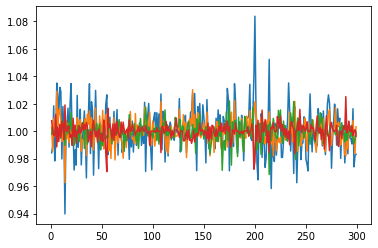

In [161]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(ret[0:500])
ret_cum = np.cumsum(ret)
plt.show()

In [162]:
asdf = [1,2,3,4]
fdsa = [2,3,4,5]
kkkk = [10,10,10,10]
np.sum((asdf,fdsa,kkkk), axis=0)

array([13, 15, 17, 19])

In [212]:
#s = [1/14, 1/14, 1/14, 1/14, 1/14, 1/14, 1/14, 1/14, 1/14, 1/14, 1/14, 1/14, 1/14, 1/14]
s = [0.25, 0.25, 0.25, 0.25]
ew = np.sum((ret[stock]*i for stock, i in zip(ETF_ticker, s)))
ew

/Users/yongcheolkim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until


0           NaN
1      0.998081
2      0.994380
3      1.005753
4      0.992213
         ...   
295    0.998983
296    1.003728
297    0.990305
298    0.990327
299    0.995543
Length: 300, dtype: float64

In [164]:
ret["122630"] * 0.5

KeyError: '122630'

In [165]:
ret

,251340,114800,280940,292580
0,NaN,NaN,NaN,NaN
1,0.984241,1.002886,0.997650,1.007545
2,0.989083,0.985612,1.002826,1.000000
3,1.018396,1.009489,0.998121,0.997004
4,0.978324,0.996385,0.997647,0.996495
...,...,...,...,...
295,0.990666,1.000000,1.001114,1.004152
296,1.016332,1.007800,0.993882,0.996899
297,0.974042,0.996130,0.991046,1.000000
298,0.982234,0.983683,0.994353,1.001037


In [166]:
ret["114800"] * 0.5

0           NaN
1      0.501443
2      0.492806
3      0.504745
4      0.498192
         ...   
295    0.500000
296    0.503900
297    0.498065
298    0.491841
299    0.501580
Name: 114800, Length: 300, dtype: float64

In [213]:
erc = np.sum((ret[stock]*ws[idx][i] for stock, i in zip(ETF_ticker, range(0,N))), axis=0)
erc

/Users/yongcheolkim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """Entry point for launching an IPython kernel.


0           NaN
1      0.999529
2      0.995621
3      1.004546
4      0.991306
         ...   
295    0.999582
296    1.003383
297    0.991369
298    0.993314
299    0.993478
Length: 300, dtype: float64

In [168]:
for i, j in zip(range(1,10), range(11,20)):
    print(i,j)

1 11
2 12
3 13
4 14
5 15
6 16
7 17
8 18
9 19


In [214]:
np.cumprod([1,2,3,4,5,6,7,8,9,10])

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [215]:
ew_cum = np.cumprod(ew)
erc_cum = np.cumprod(erc)


In [216]:
ew_cum

0           NaN
1      0.998081
2      0.992472
3      0.998181
4      0.990408
         ...   
295    0.976841
296    0.980483
297    0.970977
298    0.961584
299    0.957298
Length: 300, dtype: float64

In [217]:
erc_cum

0           NaN
1      0.999529
2      0.995153
3      0.999677
4      0.990986
         ...   
295    1.015435
296    1.018871
297    1.010077
298    1.003323
299    0.996780
Length: 300, dtype: float64

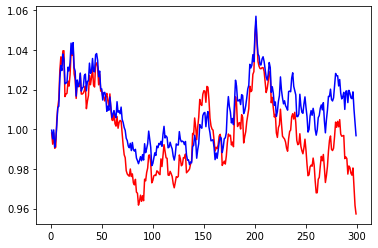

In [218]:
plt.figure()
plt.plot(ew_cum,'r')
plt.plot(erc_cum,'b')
plt.show()